# Insurance

This project was carried out with the aim of learning and experimenting with data analysis and preparation skills, and my educational source for this project is [Howsam Comprehensive Machine Learning Course](https://howsam.org/downloads/machine-learning-course/).

# Initialize

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import missingno as msno

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import SplineTransformer

from sklearn.linear_model import LinearRegression

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('../data/insurance.csv')
print(df.shape, '\n')
df.head()

(1338, 7) 



,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,NaN,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


# Missing Values

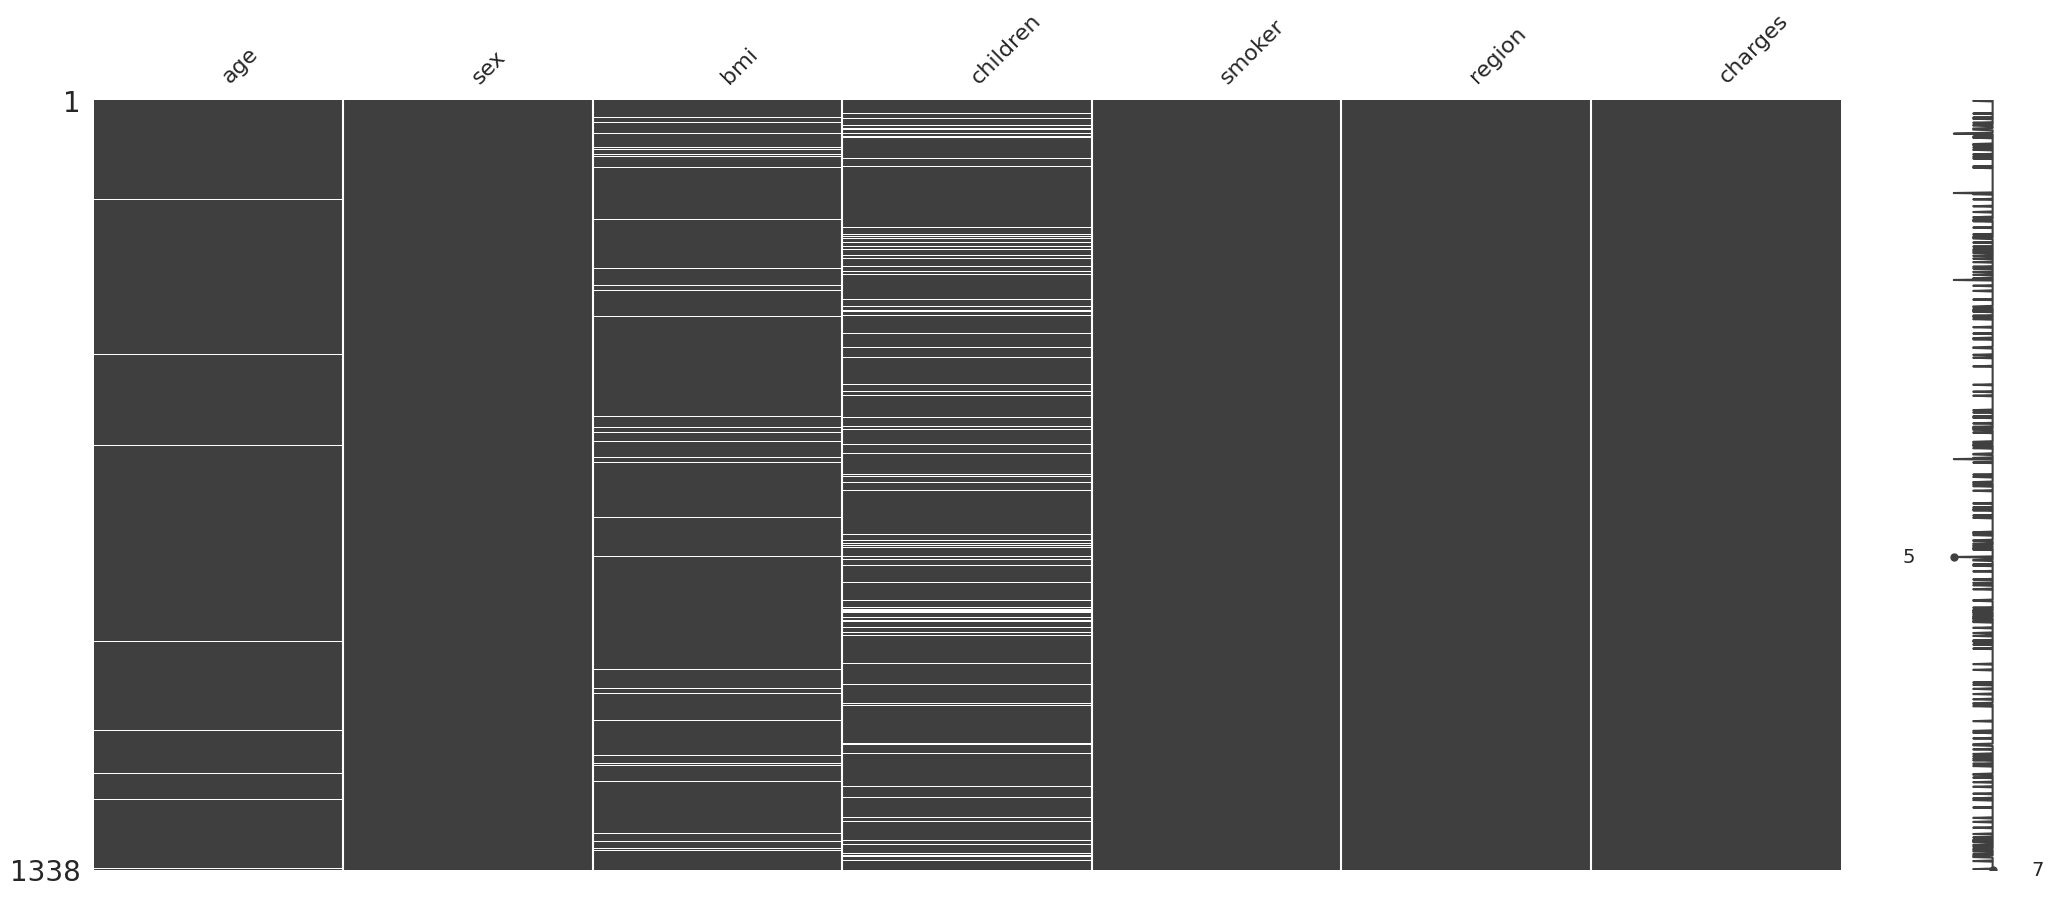

In [92]:
msno.matrix(df);

In [93]:
df.fillna({
    'children': df.children.mode().item(),
    'bmi': df[df.smoker == 'yes'].bmi.median(),
}, inplace=True)
df.dropna(inplace=True)
df.isna().sum().sum().item()

0

# Encoding

In [94]:
dfe = pd.get_dummies(df, columns=['sex', 'smoker'], dtype=np.float64, drop_first=True)
dfe = pd.get_dummies(dfe, dtype=np.float64)
dfe = dfe[['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'charges']]
dfe.head()

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19.0,27.900,0.0,0.0,1.0,0.0,0.0,0.0,1.0,16884.92400
2,28.0,33.000,3.0,1.0,0.0,0.0,0.0,1.0,0.0,4449.46200
3,33.0,22.705,0.0,1.0,0.0,0.0,1.0,0.0,0.0,21984.47061
4,32.0,28.880,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3866.85520
5,31.0,25.740,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3756.62160


# EDA

In [95]:
df.mode()

,age,sex,bmi,children,smoker,region,charges
0,19.0,male,30.11,0.0,no,southeast,1639.5631


In [96]:
df.describe()

,age,bmi,children,charges
count,1318.000000,1318.000000,1318.000000,1318.000000
mean,39.528832,30.589632,0.972686,13335.884744
std,13.909197,5.922928,1.187449,12098.305244
min,18.000000,16.815000,0.000000,1131.506600
25%,27.000000,26.410000,0.000000,4828.586213
50%,40.000000,30.110000,1.000000,9423.922650
75%,51.000000,34.298750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [97]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
5,31.0,female,25.740,0.0,no,southeast,3756.62160


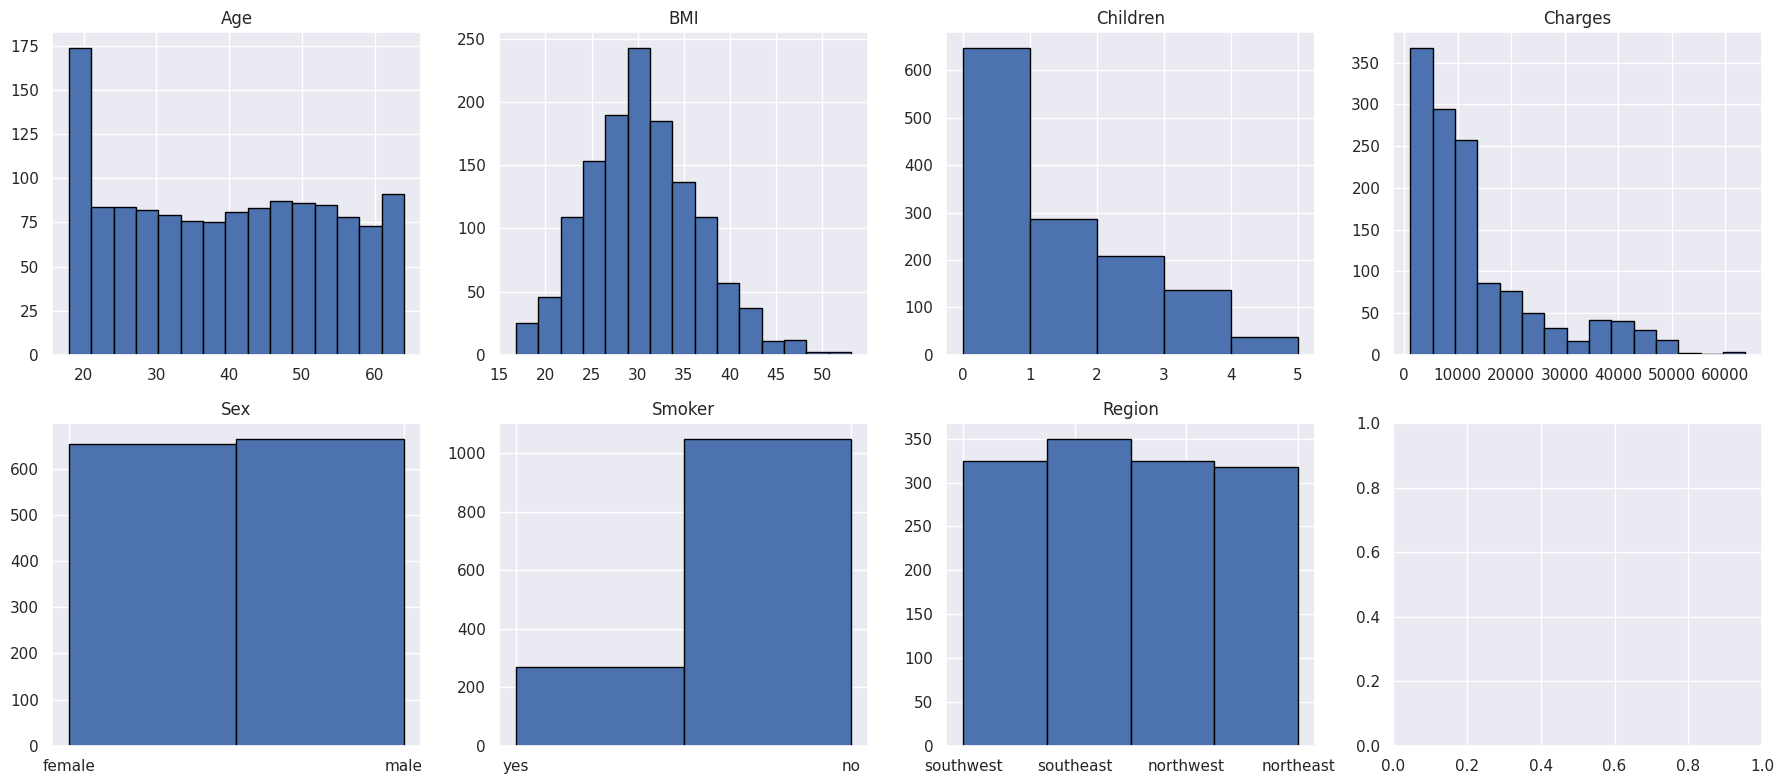

In [98]:
fig, ax = plt.subplots(2, 4, figsize=(18, 8))

ax[0, 0].hist(df.age, bins=15, edgecolor='black')
ax[0, 0].set_title('Age')

ax[0, 1].hist(df.bmi, bins=15, edgecolor='black')
ax[0, 1].set_title('BMI')

ax[0, 2].hist(df.children, bins=5, edgecolor='black')
ax[0, 2].set_title('Children')

ax[1, 0].hist(df.sex, bins=2, edgecolor='black')
ax[1, 0].set_title('Sex')

ax[1, 1].hist(df.smoker, bins=2, edgecolor='black')
ax[1, 1].set_title('Smoker')

ax[1, 2].hist(df.region, bins=4, edgecolor='black')
ax[1, 2].set_title('Region')

ax[0, 3].hist(df.charges, bins=15, edgecolor='black')
ax[0, 3].set_title('Charges')

plt.tight_layout()
plt.show()

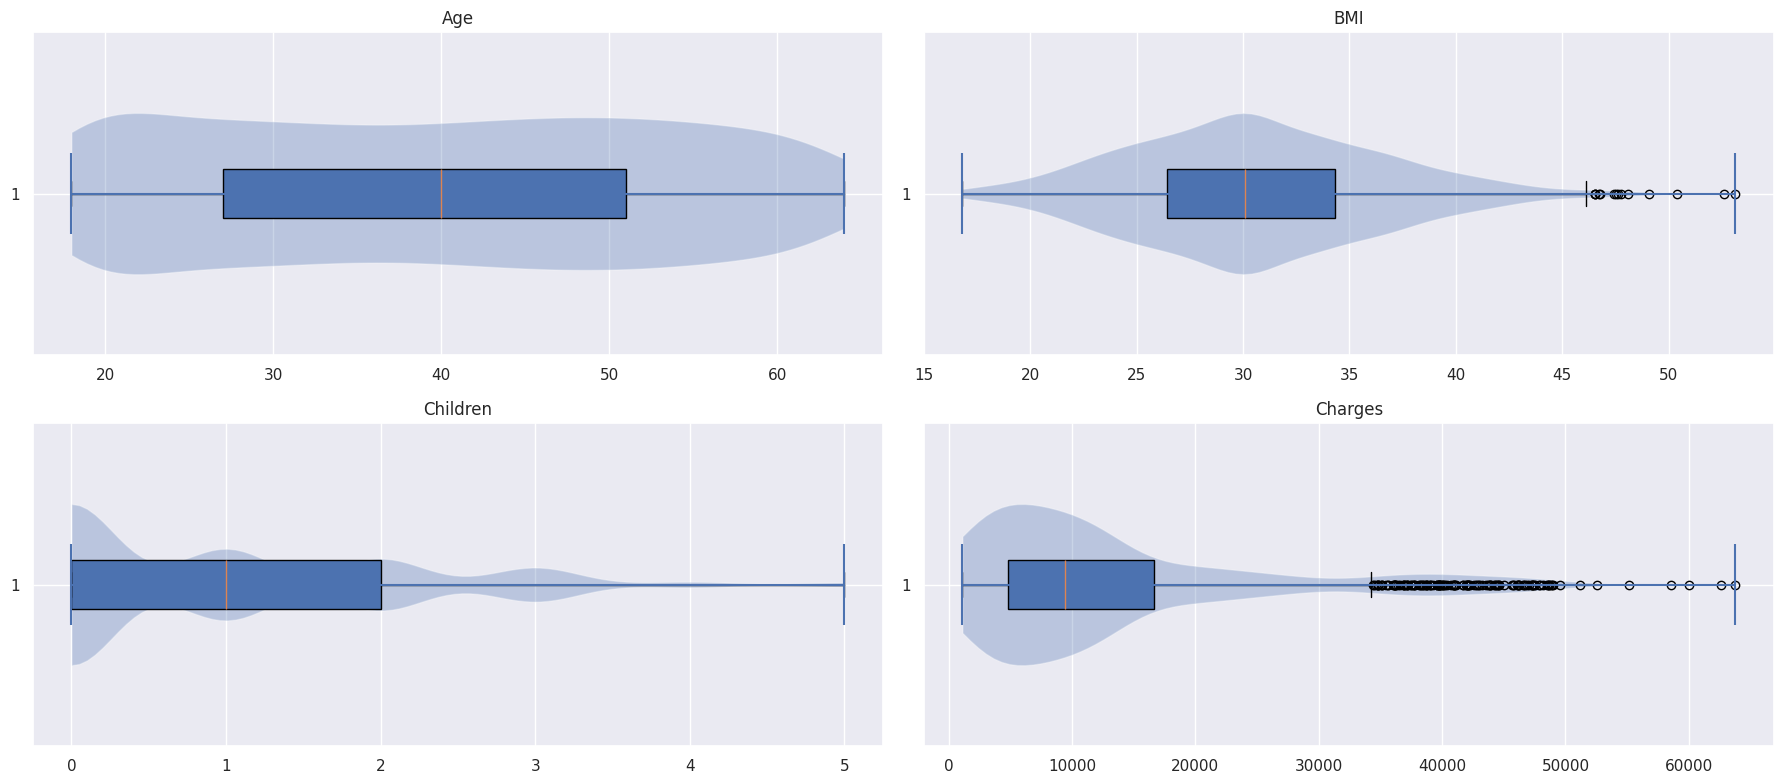

In [99]:
fig, ax = plt.subplots(2, 2, figsize=(18, 8))

ax[0, 0].boxplot(df.age, vert=False, patch_artist=True)
ax[0, 0].violinplot(df.age, vert=False)
ax[0, 0].set_title('Age')

ax[0, 1].boxplot(df.bmi, vert=False, patch_artist=True)
ax[0, 1].violinplot(df.bmi, vert=False)
ax[0, 1].set_title('BMI')

ax[1, 0].boxplot(df.children, vert=False, patch_artist=True)
ax[1, 0].violinplot(df.children, vert=False)
ax[1, 0].set_title('Children')

ax[1, 1].boxplot(df.charges, vert=False, patch_artist=True)
ax[1, 1].violinplot(df.charges, vert=False)
ax[1, 1].set_title('Charges')

plt.tight_layout()
plt.show()

In [100]:
dfc = dfe.corr(numeric_only=True)
mask = np.triu(np.ones_like(dfc, dtype=bool))
dfc = dfc.mask(mask)

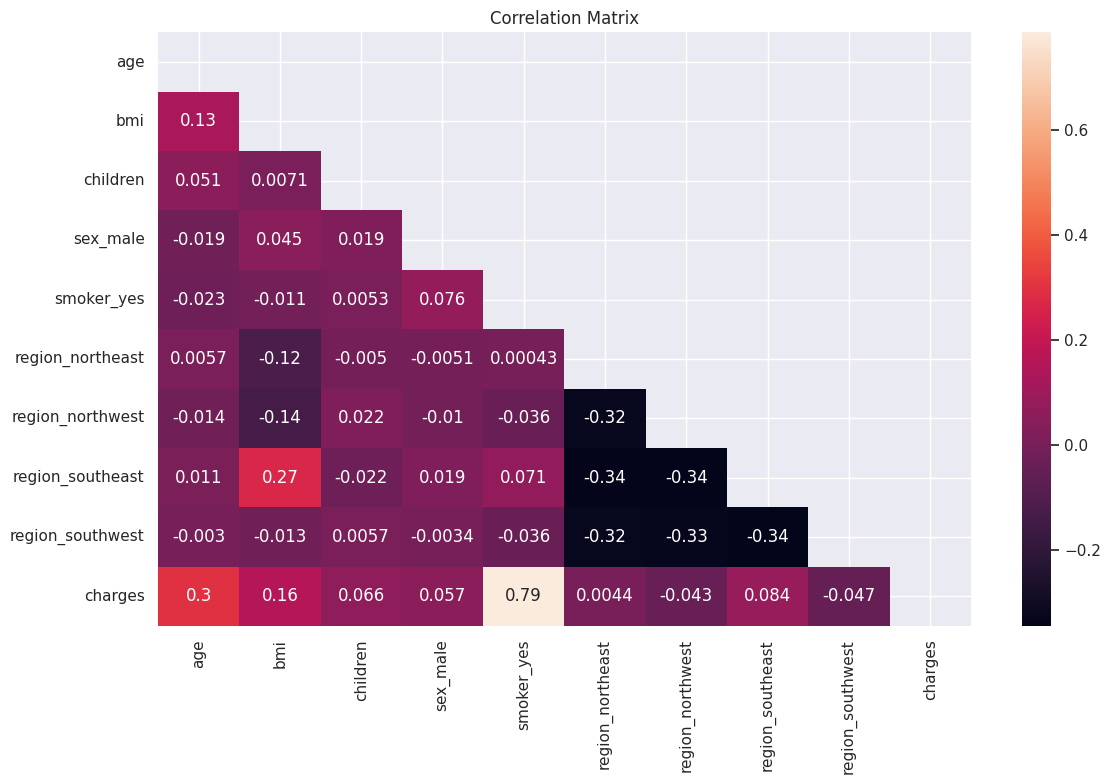

In [101]:
plt.figure(figsize=(12, 8))
sns.heatmap(dfc, annot=True)
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

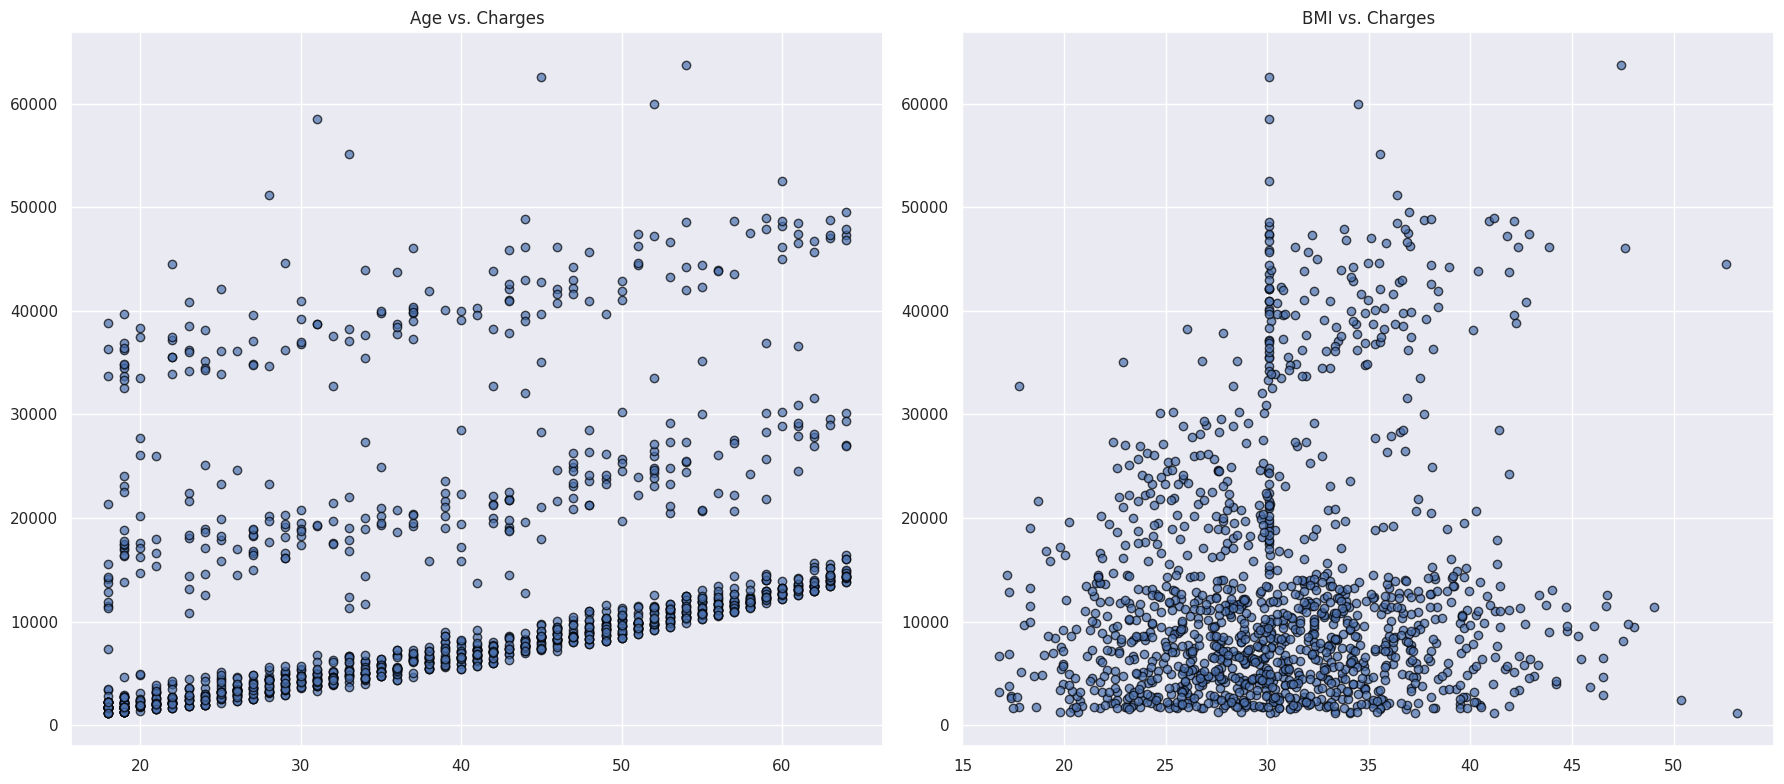

In [102]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

ax[0].scatter(df.age, df.charges, alpha=0.7, edgecolor='black')
ax[0].set_title('Age vs. Charges')

ax[1].scatter(df.bmi, df.charges, alpha=0.7, edgecolor='black')
ax[1].set_title('BMI vs. Charges')

plt.tight_layout()
plt.show()

In [103]:
pd.crosstab(df.sex, df.smoker)

smoker,no,yes
sex,,
female,540,113
male,509,156


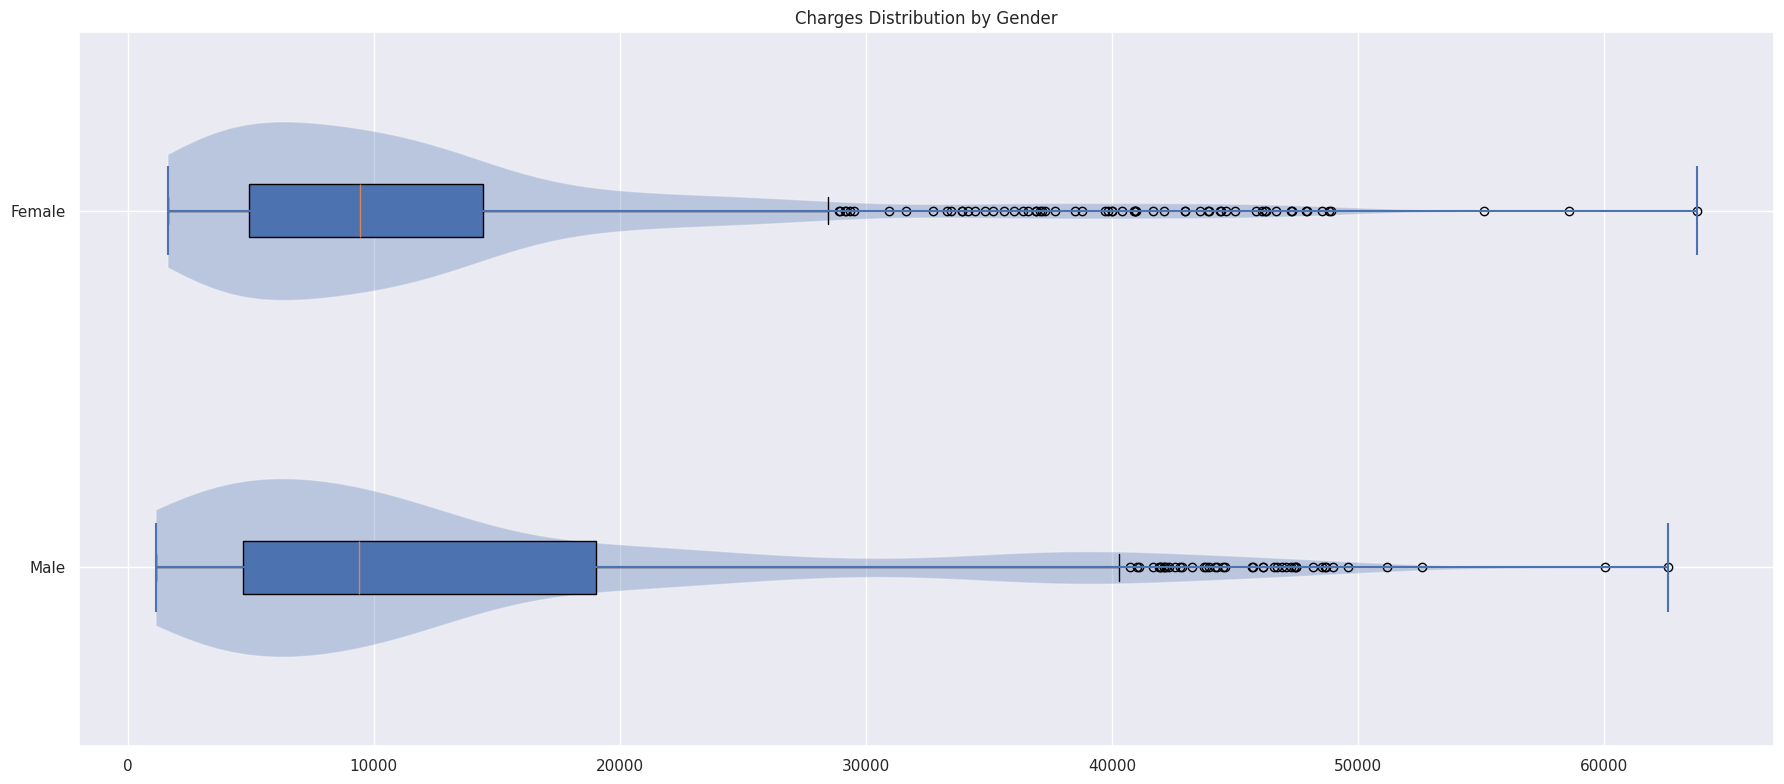

In [104]:
plt.figure(figsize=(18, 8))

plt.boxplot([
    df[df.sex == 'male'].charges,
    df[df.sex == 'female'].charges,
], vert=False, patch_artist=True)
plt.violinplot([
    df[df.sex == 'male'].charges,
    df[df.sex == 'female'].charges,
], vert=False, )

plt.title('Charges Distribution by Gender')
plt.yticks([1, 2], ['Male', 'Female'])

plt.tight_layout()
plt.show()

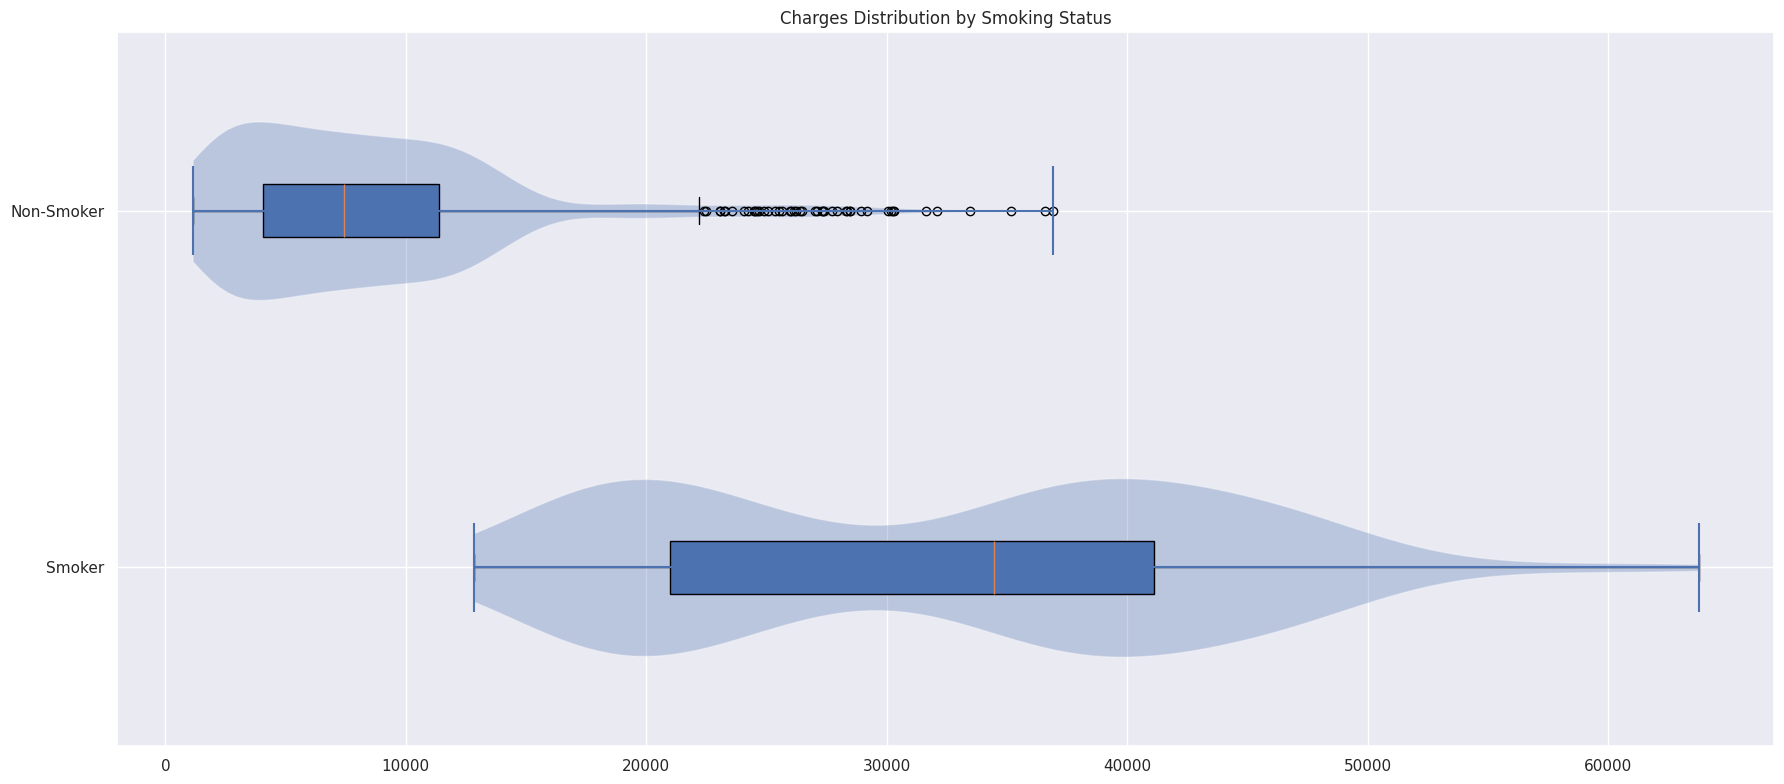

In [105]:
plt.figure(figsize=(18, 8))

plt.boxplot([
    df[df.smoker == 'yes'].charges,
    df[df.smoker == 'no'].charges,
], vert=False, patch_artist=True)
plt.violinplot([
    df[df.smoker == 'yes'].charges,
    df[df.smoker == 'no'].charges,
], vert=False, )

plt.title('Charges Distribution by Smoking Status')
plt.yticks([1, 2], ['Smoker', 'Non-Smoker'])

plt.tight_layout()
plt.show()

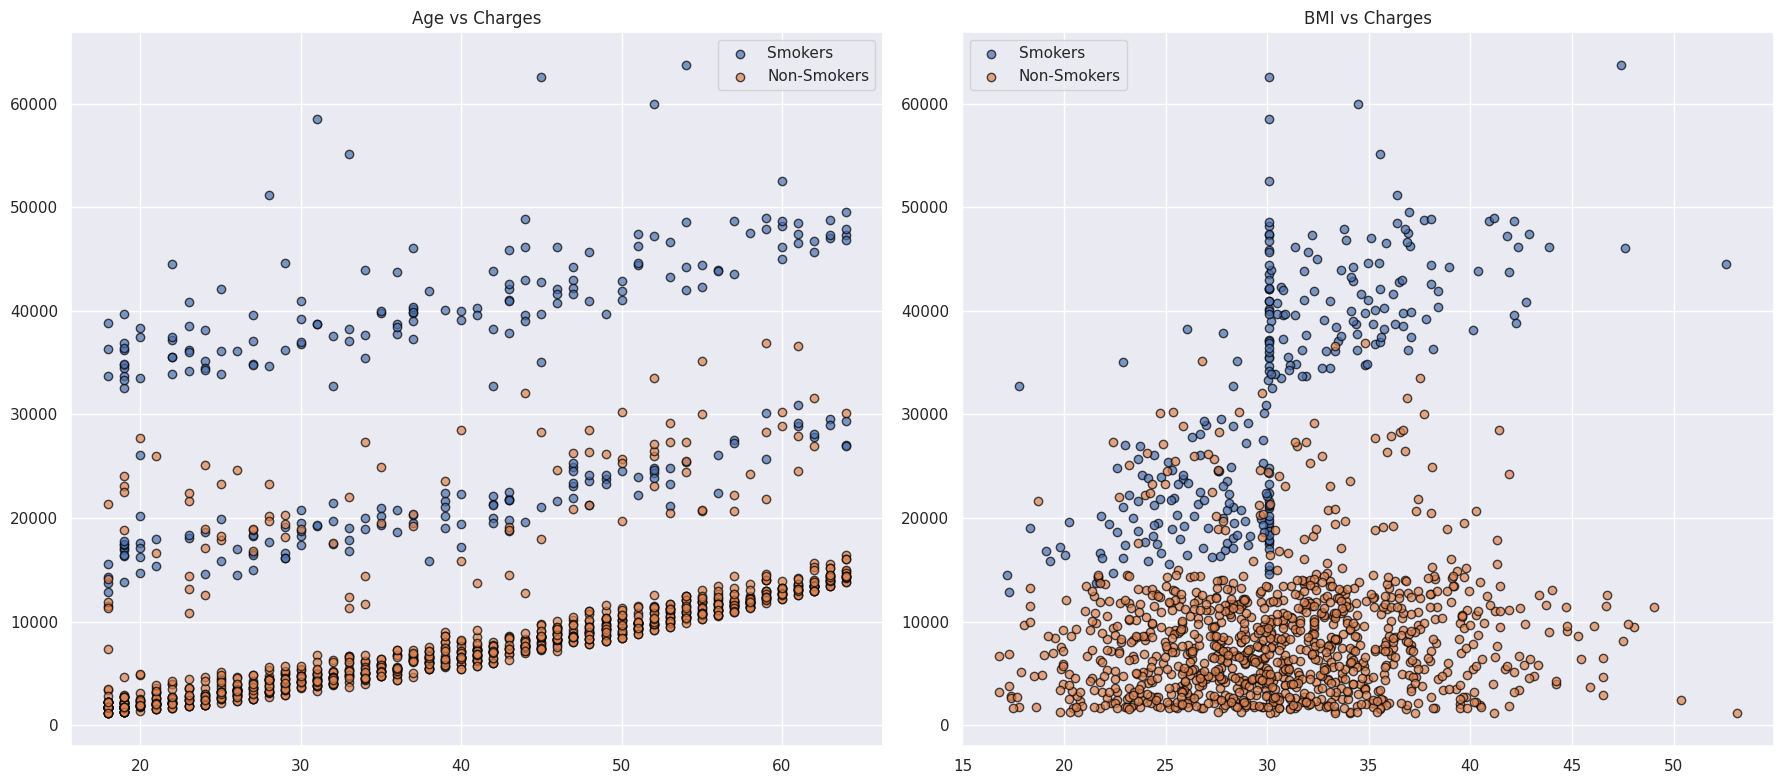

In [106]:
smokers = df.smoker == 'yes'

fig, ax = plt.subplots(1, 2, figsize=(18, 8))

ax[0].scatter(df[smokers].age, df[smokers].charges, alpha=0.7, edgecolor='black')
ax[0].scatter(df[~smokers].age, df[~smokers].charges, alpha=0.7, edgecolor='black')
ax[0].set_title('Age vs Charges')
ax[0].legend(['Smokers', 'Non-Smokers'])

ax[1].scatter(df[smokers].bmi, df[smokers].charges, alpha=0.7, edgecolor='black')
ax[1].scatter(df[~smokers].bmi, df[~smokers].charges, alpha=0.7, edgecolor='black')
ax[1].set_title('BMI vs Charges')
ax[1].legend(['Smokers', 'Non-Smokers'])

plt.tight_layout()
plt.show()

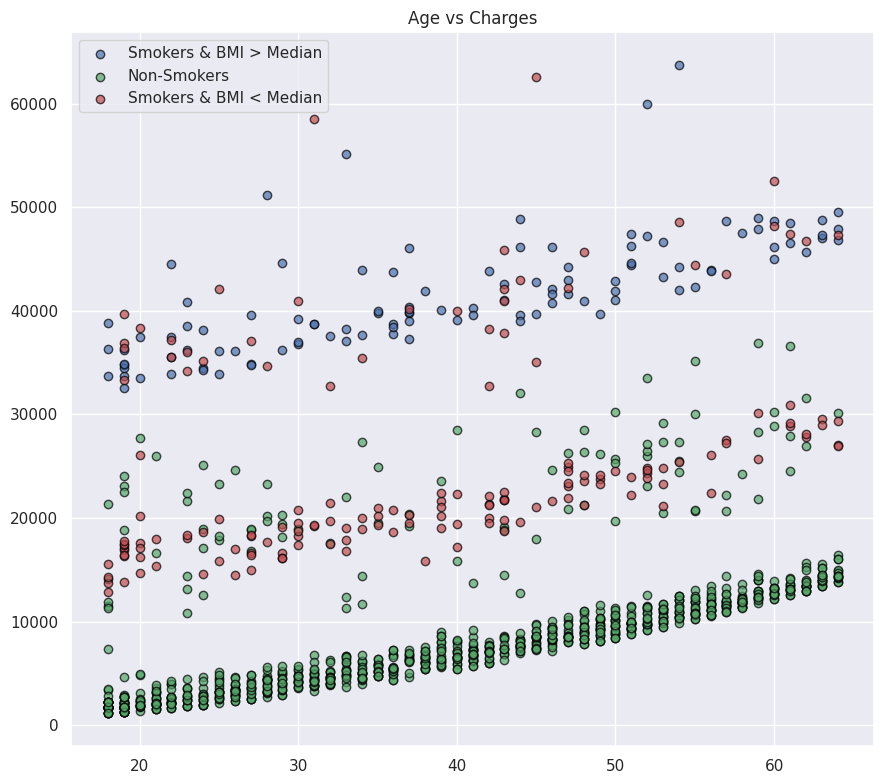

In [107]:
plt.figure(figsize=(9, 8))

smokers = df.smoker == 'yes'
bmis = df.bmi > df.bmi.median()

plt.scatter(df[smokers & bmis].age, df[smokers & bmis].charges, alpha=0.7, edgecolor='black', c='b')
plt.scatter(df[~smokers].age, df[~smokers].charges, alpha=0.7, edgecolor='black', c='g')
plt.scatter(df[smokers & ~bmis].age, df[smokers & ~bmis].charges, alpha=0.7, edgecolor='black', c='r')
plt.legend(['Smokers & BMI > Median', 'Non-Smokers', 'Smokers & BMI < Median'])
plt.title('Age vs Charges')

plt.tight_layout()
plt.show()

# Outliers

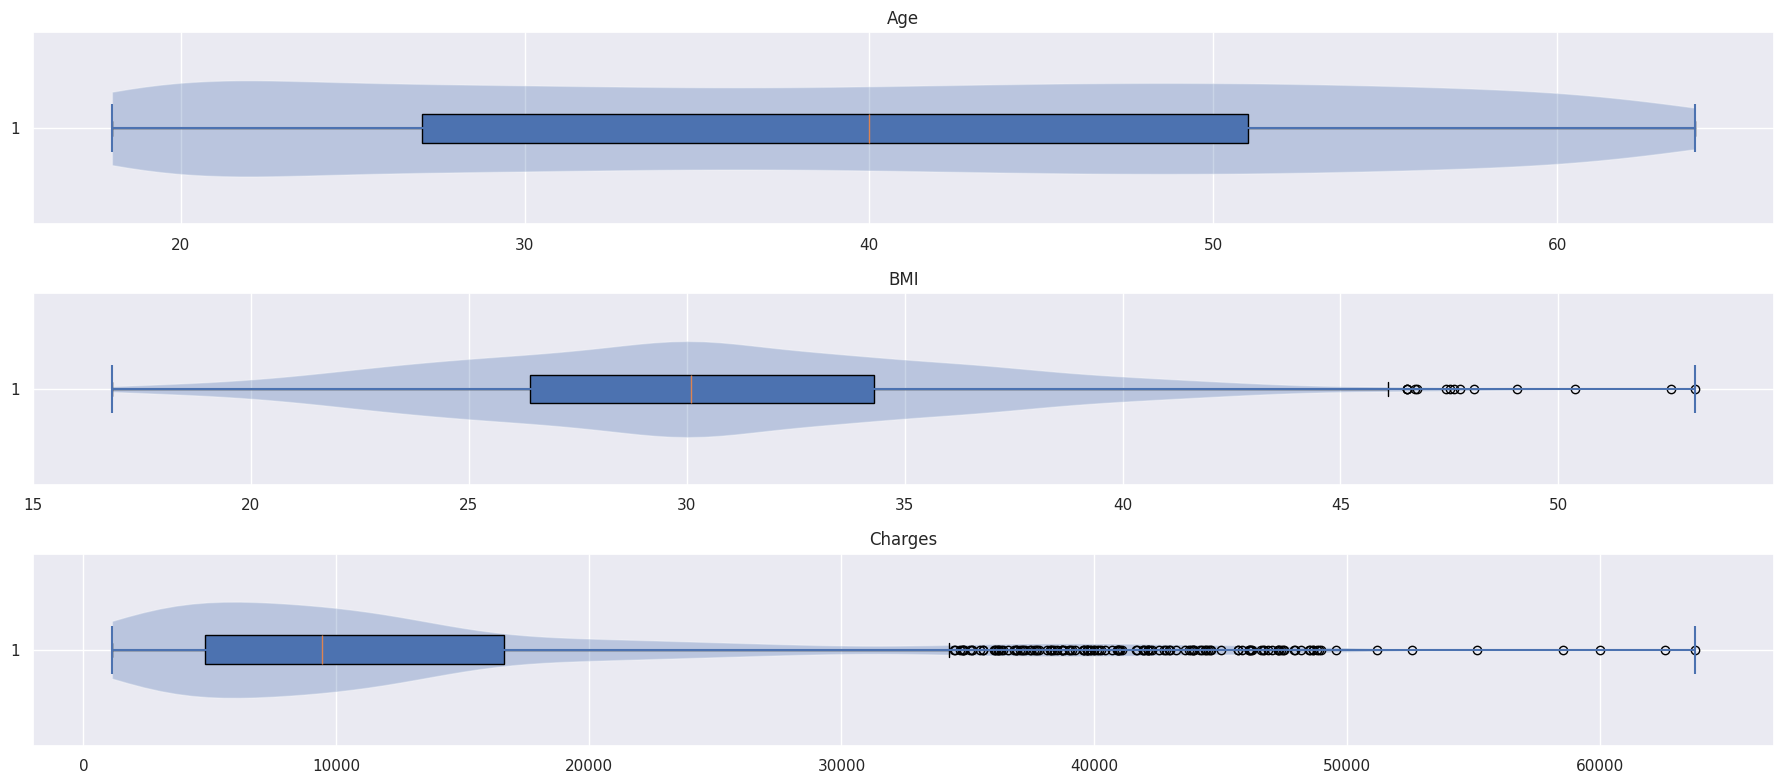

In [108]:
fig, ax = plt.subplots(3, 1, figsize=(18, 8))

ax[0].boxplot(df.age, vert=False, patch_artist=True)
ax[0].violinplot(df.age, vert=False)
ax[0].set_title('Age')

ax[1].boxplot(df.bmi, vert=False, patch_artist=True)
ax[1].violinplot(df.bmi, vert=False)
ax[1].set_title('BMI')

ax[2].boxplot(df.charges, vert=False, patch_artist=True)
ax[2].violinplot(df.charges, vert=False)
ax[2].set_title('Charges')

plt.tight_layout()
plt.show()

In [109]:
Q1 = df.describe().loc['25%']
Q3 = df.describe().loc['75%']
IQR = Q3 - Q1
upper_cap = Q3 + 1.5 * IQR
lower_cap = Q1 - 1.5 * IQR

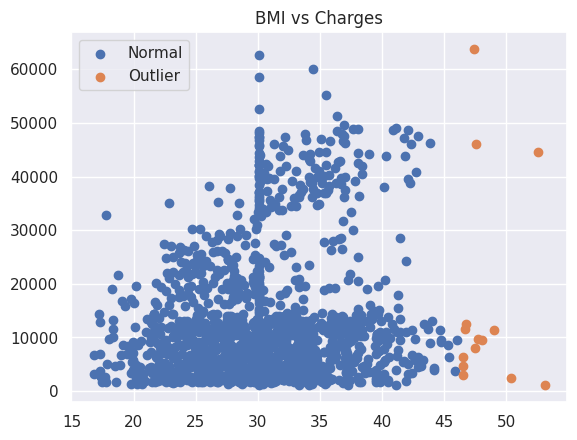

In [110]:
plt.scatter(df[df.bmi < upper_cap.bmi].bmi, df[df.bmi < upper_cap.bmi].charges)
plt.scatter(df[df.bmi > upper_cap.bmi].bmi, df[df.bmi > upper_cap.bmi].charges)
plt.legend(['Normal', 'Outlier'])
plt.title('BMI vs Charges')
plt.show()

In [111]:
df.drop(df[df.bmi > upper_cap.bmi].index, inplace=True)

# Normalize

In [112]:
scaler = StandardScaler()
dfe[['age', 'bmi', 'children', 'charges']] = scaler.fit_transform(dfe[['age', 'bmi', 'children', 'charges']])
dfe.head()

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,-1.476478,-0.454277,-0.819450,0.0,1.0,0.0,0.0,0.0,1.0,0.293461
2,-0.829179,0.407110,1.707933,1.0,0.0,0.0,0.0,1.0,0.0,-0.734797
3,-0.469568,-1.331710,-0.819450,1.0,0.0,0.0,1.0,0.0,0.0,0.715131
4,-0.541490,-0.288756,-0.819450,1.0,0.0,0.0,1.0,0.0,0.0,-0.782971
5,-0.613412,-0.819100,-0.819450,0.0,0.0,0.0,0.0,1.0,0.0,-0.792086


# Feature Engineering

In [113]:
dfe.drop(columns=['sex_male', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest'], inplace=True)
dfe.head()

In [114]:
X = dfe.drop(columns=['charges'])
y = dfe.charges

# Model

In [115]:
degree = 3
n_knots = 3

model = make_pipeline(
    SplineTransformer(degree=degree, n_knots=n_knots),
    LinearRegression()
)

params = {
    'splinetransformer__degree': [1, 2, 3, 4, 5],
    'splinetransformer__n_knots': [2, 3, 4, 5, 6],
}

grid = GridSearchCV(model, params)
grid.fit(X, y)
grid.score(X, y), grid.best_params_

(0.7446268481492568,
 {'splinetransformer__degree': 1, 'splinetransformer__n_knots': 3})